### Raffi Argianda
### 221351112
### Malam B

### Load Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
data = pd.read_csv('dataset_nasabah.csv')
data.head()

,ID Nasabah,Usia,Jenis Kelamin,Status Merokok,BMI,Jumlah Klaim,Total Biaya Klaim
0,1,58,Pria,Ya,30.7,1,4744854
1,2,26,Pria,Ya,28.2,0,0
2,3,19,Pria,Ya,22.3,4,5780796
3,4,53,Pria,Tidak,22.1,4,22669060
4,5,69,Pria,Ya,30.0,2,11323814


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID Nasabah         2000 non-null   int64  
 1   Usia               2000 non-null   int64  
 2   Jenis Kelamin      2000 non-null   object 
 3   Status Merokok     2000 non-null   object 
 4   BMI                2000 non-null   float64
 5   Jumlah Klaim       2000 non-null   int64  
 6   Total Biaya Klaim  2000 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 109.5+ KB


### EDA

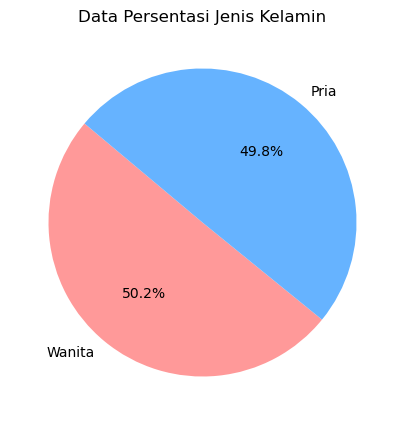

In [3]:
# Pie
gender_count = data['Jenis Kelamin'].value_counts()
plt.figure(figsize=(5,5))
gender_count.plot.pie(autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Data Persentasi Jenis Kelamin')
plt.ylabel('')
plt.show()

Jumlah data keseluruhan lebih banyak wanita sebanya 50%

C:\Users\rapsa\AppData\Local\Temp\ipykernel_20876\1360453016.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = data, x = 'Status Merokok', y = 'BMI', palette= 'Set2')


<function matplotlib.pyplot.show(close=None, block=None)>

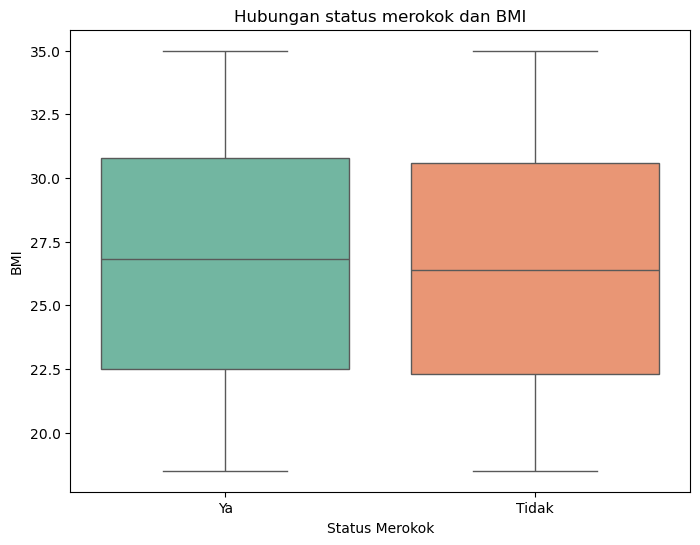

In [4]:
# Box plot
plt.figure(figsize=(8,6))
sns.boxplot(data = data, x = 'Status Merokok', y = 'BMI', palette= 'Set2')
plt.title('Hubungan status merokok dan BMI')
plt.xlabel('Status Merokok')
plt.ylabel('BMI')
plt.show

Median pada data merokok di rentang bmi 22.5 - 30.0 begitu juga pada data tidak merokok

C:\Users\rapsa\AppData\Local\Temp\ipykernel_20876\183770592.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = data, x = 'Jenis Kelamin', y = 'Usia', palette = 'Set2')


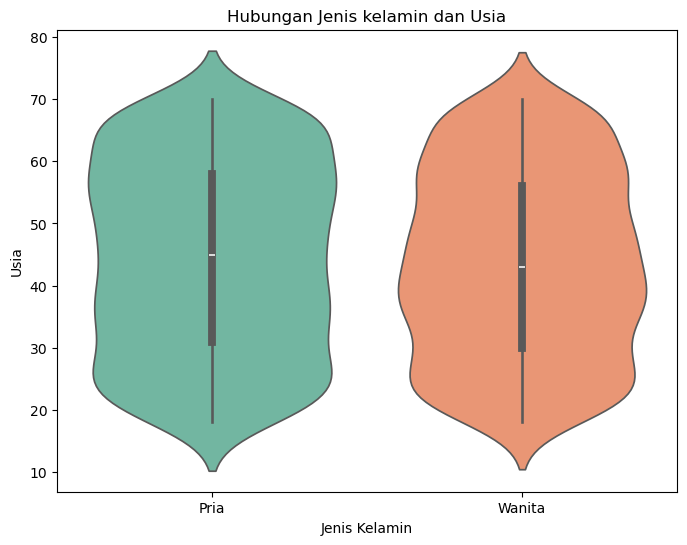

In [5]:
# Violin
plt.figure(figsize=(8,6))
sns.violinplot(data = data, x = 'Jenis Kelamin', y = 'Usia', palette = 'Set2')
plt.title('Hubungan Jenis kelamin dan Usia')
plt.show()

Pada pria lebih banyak umur 50 sampai 65 dan wanita lebih banyak umur 30 sampai 40

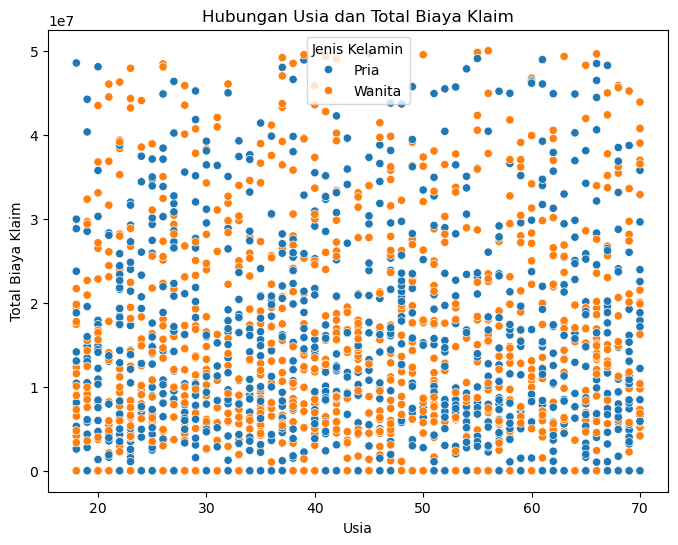

In [6]:
# Scatter
plt.figure(figsize=(8,6))
sns.scatterplot(data = data, x = 'Usia', y = 'Total Biaya Klaim', hue = 'Jenis Kelamin')
plt.title('Hubungan Usia dan Total Biaya Klaim')
plt.show()

Rata rata klaim biata pada rentang 0 sampai 2 dengan paling banyak klaim pada usia 20 hingga 40

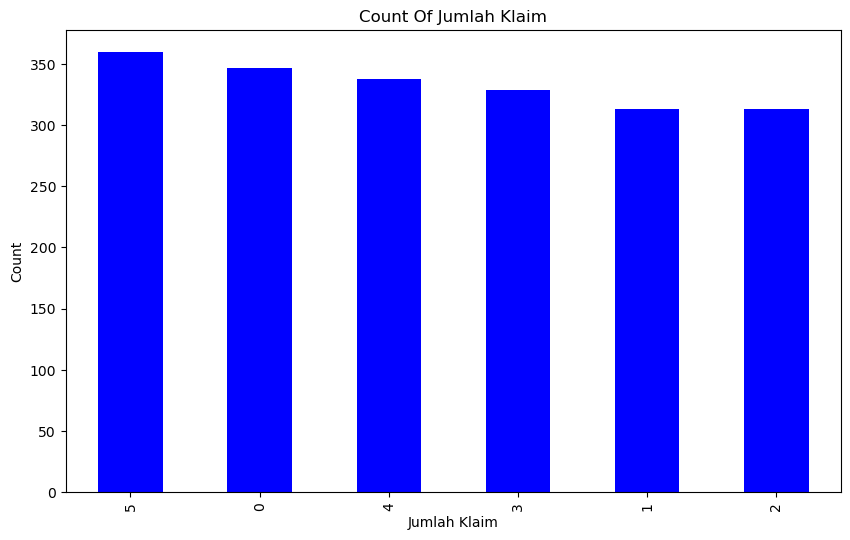

In [7]:
plt.figure(figsize=(10,6))
data['Jumlah Klaim'].value_counts().plot(kind='bar', color = 'blue')
plt.title('Count Of Jumlah Klaim')
plt.xlabel('Jumlah Klaim')
plt.ylabel('Count')
plt.show()

### Model

In [8]:
data_konversi = data.copy()

In [9]:
# Pra-pemrosesan data
# Mengonversi kolom kategorikal menjadi numerik

data_konversi['Jenis Kelamin'] = data_konversi['Jenis Kelamin'].map({'Pria':0, 'Wanita':1})
data_konversi['Status Merokok'] = data_konversi['Status Merokok'].map({'Tidak':0, 'Ya':1})
data_konversi.head()

,ID Nasabah,Usia,Jenis Kelamin,Status Merokok,BMI,Jumlah Klaim,Total Biaya Klaim
0,1,58,0,1,30.7,1,4744854
1,2,26,0,1,28.2,0,0
2,3,19,0,1,22.3,4,5780796
3,4,53,0,0,22.1,4,22669060
4,5,69,0,1,30.0,2,11323814


In [10]:
features = ['Usia', 'Jenis Kelamin', 'Status Merokok', 'BMI', 'Jumlah Klaim', 'Total Biaya Klaim']
x = data_konversi[features]

In [11]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [12]:
linked = linkage(x_scaled, method='ward')

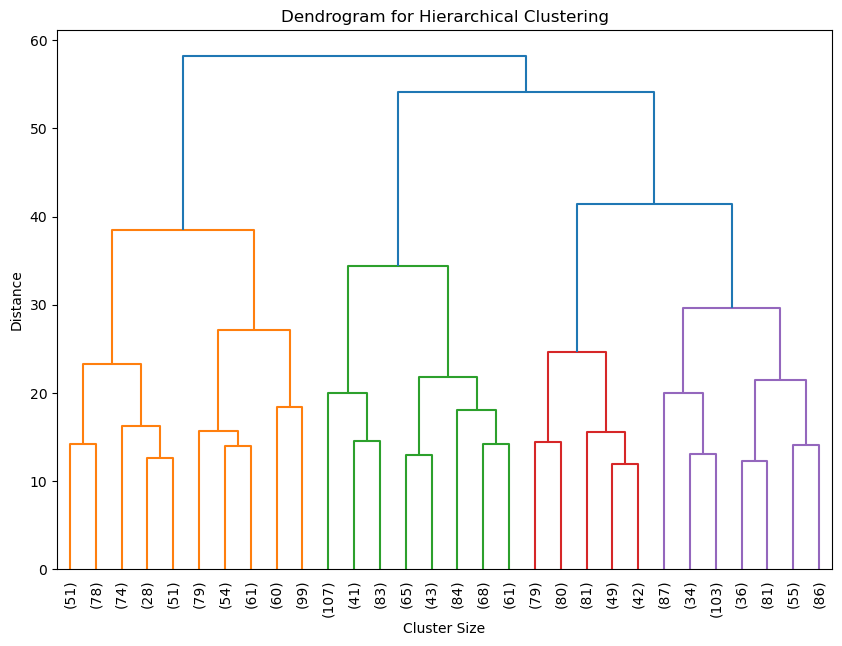

In [13]:
plt.figure(figsize=(10,7))
plt.title('Dendrogram for Hierarchical Clustering')
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90, leaf_font_size=10)
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

In [14]:
cluster_labels = cut_tree(linked, n_clusters=5).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 4, 4], dtype=int64)

In [15]:
data_konversi['Cluster_Labels'] = cluster_labels
data_konversi.head()

,ID Nasabah,Usia,Jenis Kelamin,Status Merokok,BMI,Jumlah Klaim,Total Biaya Klaim,Cluster_Labels
0,1,58,0,1,30.7,1,4744854,0
1,2,26,0,1,28.2,0,0,0
2,3,19,0,1,22.3,4,5780796,0
3,4,53,0,0,22.1,4,22669060,1
4,5,69,0,1,30.0,2,11323814,0


### Profiling cluster

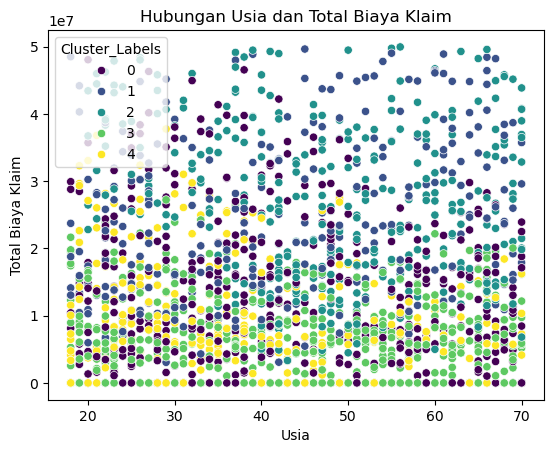

In [16]:
plt.figure()
sns.scatterplot(data = data_konversi,
                x = 'Usia',
                y = 'Total Biaya Klaim',
                hue = 'Cluster_Labels',
                palette='viridis')
plt.title('Hubungan Usia dan Total Biaya Klaim')
plt.xlabel('Usia')
plt.ylabel('Total Biaya Klaim')
plt.show()

#### Tugas Scatterplot

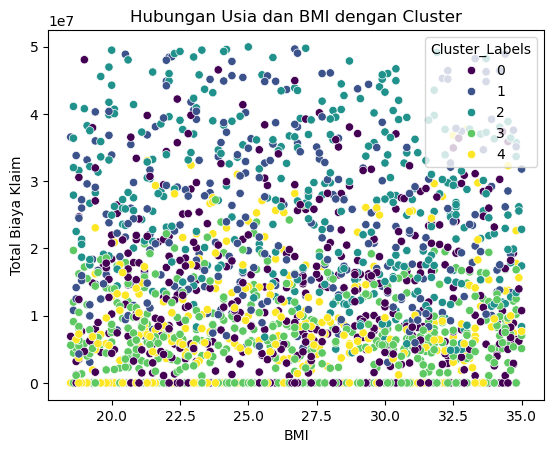

In [17]:
plt.figure()
sns.scatterplot(data = data_konversi,
                x = 'BMI',
                y = 'Total Biaya Klaim',
                hue = 'Cluster_Labels',
                palette='viridis')
plt.title('Hubungan Usia dan BMI dengan Cluster')
plt.xlabel('BMI')
plt.ylabel('Total Biaya Klaim')
plt.show()

Rata rata cluster 3 dan 4 dengan total biaya klaim terbanyak pada rentang 0 sampai 2 dengan BMI 22.5 hingga 32.5. Sedangkan cluster 0 - 2 denagn total biaya klaim terbanyak pada rentang 3 sampai 5

C:\Users\rapsa\AppData\Local\Temp\ipykernel_20876\415622683.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = data_konversi,


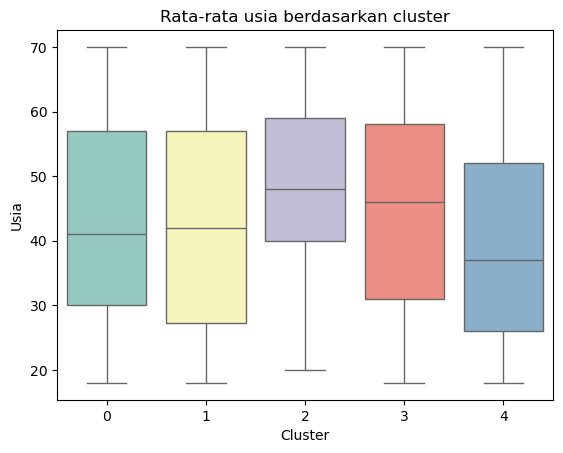

In [18]:
sns.boxplot(data = data_konversi,
            x = 'Cluster_Labels',
            y = 'Usia',
            palette='Set3')
plt.title('Rata-rata usia berdasarkan cluster')
plt.xlabel('Cluster')
plt.ylabel('Usia')
plt.show()

#### Tugas Boxplot

C:\Users\rapsa\AppData\Local\Temp\ipykernel_20876\415622683.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = data_konversi,


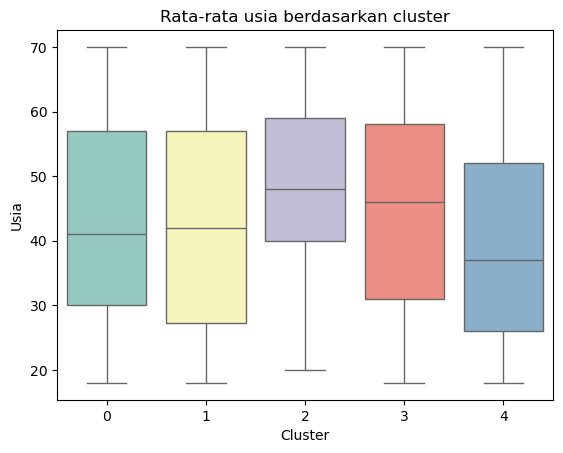

In [19]:
sns.boxplot(data = data_konversi,
            x = 'Cluster_Labels',
            y = 'Usia',
            palette='Set3')
plt.title('Rata-rata usia berdasarkan cluster')
plt.xlabel('Cluster')
plt.ylabel('Usia')
plt.show()

- cluster 0 dengan median data usia 30-58,
- cluster 1 dengan median data usia 28-58,
- cluster 2 dengan median data usia 40-59,
- cluster 3 dengan median data usia 32-58,
- cluster 4 dengan median data usia 28-52